In [1]:
import nltk
import sklearn
import pycaret
import pandas as pd

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The pycaret version is {}.'.format(pycaret.__version__))
print('The pandas version is {}.'.format(pd.__version__))

The nltk version is 3.5.
The scikit-learn version is 0.23.2.
The pycaret version is 2.3.10.
The pandas version is 1.1.3.


In [6]:
df = pd.read_csv('adult.csv')
#check the shape of data
df.shape

(32563, 15)

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.5)
train.shape

(16281, 15)

In [8]:
train.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
5483,19.0,Self-emp-not-inc,30800.0,10th,6.0,Married-spouse-absent,Adm-clerical,Unmarried,Amer-Indian-Eskimo,Female,0.0,0.0,40.0,United-States,<=50K
28319,38.0,Private,283293.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
15609,21.0,Private,195532.0,HS-grad,9.0,Never-married,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
18887,46.0,Federal-gov,106252.0,Some-college,10.0,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
24568,22.0,Private,363219.0,Some-college,10.0,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,20.0,United-States,<=50K


In [9]:
train.groupby('y').nunique().head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
y,,,,,,,,,,,,,,
<=50K,71,8,10375,16,16,7,14,6,5,2,82,61,87,40
>50K,64,6,3361,15,15,7,12,6,5,2,32,25,70,38


### (1) Lakukan modeling pada data Adult menggunakan PyCaret dan tentukan 3 model yang memiliki kinerja terbaik.

In [10]:
from pycaret.classification import *
clf1 = setup(train, target = 'y', log_experiment = True, experiment_name = 'adult1')

best_model = compare_models(include=['lr','svm','ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8633,0.9158,0.6219,0.7724,0.6886,0.6024,0.6085,8.1510
ridge,Ridge Classifier,0.8601,0.0000,0.5747,0.7939,0.6662,0.5807,0.5931,8.2850
svm,SVM - Linear Kernel,0.8596,0.0000,0.5584,0.8125,0.6575,0.5735,0.5920,4.4270


In [11]:
model1 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8544,0.8966,0.5884,0.7581,0.6626,0.5716,0.5791
1,0.8675,0.9189,0.6137,0.7944,0.6925,0.6098,0.6181
2,0.8623,0.9164,0.6354,0.7586,0.6916,0.6038,0.6077
3,0.8711,0.9201,0.6643,0.7731,0.7146,0.6319,0.6349
4,0.8509,0.9170,0.6115,0.7328,0.6667,0.5716,0.5755
5,0.8632,0.9186,0.6583,0.7500,0.7011,0.6129,0.6151
6,0.8797,0.9248,0.6390,0.8271,0.7210,0.6459,0.6547
7,0.8657,0.9172,0.6173,0.7844,0.6909,0.6067,0.6138
8,0.8622,0.9169,0.5993,0.7830,0.6789,0.5931,0.6017


### (2) Lakukan normalisasi terhadap fitur yang tidak normal dan lakukan modeling menggunakan PyCaret. Bandingkan hasilnya dengan model di (1)

In [12]:
clf2 = setup(train, target = 'y', normalize = True, log_experiment = True, experiment_name = 'adult1')
model2 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8675,0.9132,0.6209,0.7890,0.6949,0.6119,0.6190
1,0.8781,0.9249,0.6462,0.8136,0.7203,0.6437,0.6507
2,0.8719,0.9257,0.6570,0.7811,0.7137,0.6320,0.6360
3,0.8632,0.9213,0.6282,0.7665,0.6905,0.6037,0.6087
4,0.8588,0.9157,0.6029,0.7661,0.6747,0.5862,0.5930
5,0.8588,0.9114,0.6245,0.7522,0.6824,0.5926,0.5969
6,0.8622,0.9182,0.6341,0.7576,0.6903,0.6026,0.6065
7,0.8771,0.9274,0.6413,0.8119,0.7166,0.6395,0.6468
8,0.8665,0.9203,0.6341,0.7743,0.6972,0.6127,0.6177


In [13]:
# Logistic Regression Accuracy
# model1 = 0.8633 
# model2 = 0.8679

### (3) Pilih 5 prediktor terbaik dan lakukan modeling menggunakan PyCaret. Bandingkan hasilnya model di (1) dan (2).

In [13]:
# iterating the columns
for col in train.columns:
    print(col)

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
y


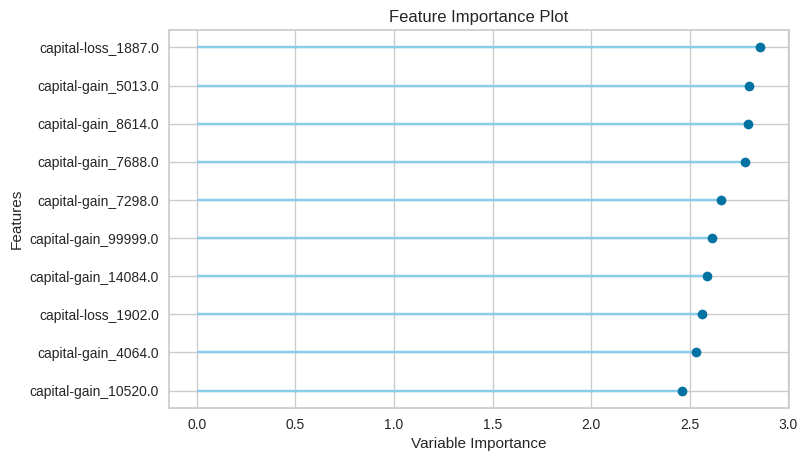

In [14]:
# Feature Importance
from pycaret.classification import *

plot_model(model2, plot = 'feature')

In [15]:
from pycaret.classification import *

clf3 = setup(train, target = 'y', log_experiment = True, experiment_name = 'adult1', feature_selection = True)
model3 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8684,0.9094,0.6400,0.7753,0.7012,0.6178,0.6225
1,0.8737,0.9255,0.6545,0.7860,0.7143,0.6341,0.6384
2,0.8781,0.9300,0.6764,0.7881,0.7280,0.6500,0.6532
3,0.8553,0.9176,0.5855,0.7594,0.6612,0.5711,0.5789
4,0.8404,0.8977,0.5418,0.7268,0.6208,0.5224,0.5315
5,0.8728,0.9230,0.6473,0.7876,0.7106,0.6301,0.6351
6,0.8595,0.9212,0.6073,0.7626,0.6761,0.5879,0.5941
7,0.8455,0.9035,0.5709,0.7302,0.6408,0.5443,0.5509
8,0.8867,0.9401,0.6945,0.8093,0.7476,0.6751,0.6784


In [ ]:
# model1 = 0.8633 
# model2 = 0.8679
# model3 = 0.8650

### (4) Jika ada data yang merupakan outlier, hapus data yang memuat outlier dan lakukan modeling menggunakan PyCaret. Bandingkan hasilnya dengan model di (1), (2), dan (3).

In [16]:
clf4 = setup(train, target='y', log_experiment = True, experiment_name = 'adult1',remove_outliers = True)
model4 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8643,0.9224,0.6031,0.7861,0.6825,0.5981,0.6066
1,0.8643,0.9055,0.6221,0.7725,0.6892,0.6037,0.6095
2,0.8587,0.9154,0.6260,0.7489,0.6819,0.5920,0.5960
3,0.8541,0.9143,0.6084,0.7442,0.6695,0.5771,0.5819
4,0.8763,0.9222,0.6464,0.8057,0.7173,0.6393,0.6457
5,0.8541,0.9119,0.6274,0.7333,0.6762,0.5828,0.5858
6,0.8688,0.9208,0.6603,0.7655,0.7090,0.6249,0.6277
7,0.8632,0.9228,0.6145,0.7740,0.6851,0.5992,0.6057
8,0.8678,0.9218,0.6298,0.7820,0.6977,0.6144,0.6203


In [13]:
# model1 = 0.8633 
# model2 = 0.8679
# model3 = 0.8650
# model4 = 0.8650

### (5) Lakukan normalisasi, hapus outlier, dan pilih 5 preditor terbaik dan lakukan modeling menggunakan PyCaret. Bandingkan hasilnya dengan model (1), (2), (3), dan (4).

In [19]:
clf5 = setup(train, target = 'y', log_experiment = True, experiment_name = 'adult1', normalize = True, feature_selection = True, remove_outliers = True)
model5 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8652,0.9159,0.6473,0.7523,0.6958,0.6099,0.6127
1,0.8744,0.9232,0.6783,0.7675,0.7202,0.6396,0.6416
2,0.8763,0.9358,0.6318,0.8069,0.7087,0.6316,0.6392
3,0.8569,0.9060,0.5907,0.7574,0.6638,0.5746,0.5818
4,0.8615,0.9164,0.6100,0.7633,0.6781,0.5913,0.5973
5,0.8643,0.9184,0.6293,0.7617,0.6892,0.6034,0.6079
6,0.8660,0.9122,0.5775,0.8054,0.6727,0.5913,0.6042
7,0.8688,0.9201,0.6357,0.7736,0.6979,0.6151,0.6199
8,0.8540,0.9195,0.6047,0.7358,0.6638,0.5717,0.5762


In [ ]:
# model1 = 0.8633 
# model2 = 0.8679
# model3 = 0.8650
# model4 = 0.8650
# model5 = 0.8642 

### (6) Lakukan hyperparameter tuning pada 2 model terbaik di (5) dan bandingkan hasilnya dengan model yang sebelum di tuning.

In [21]:
# https://pycaret.gitbook.io/docs/get-started/functions/optimize#increasing-the-iteration
model6 = tune_model(model5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8670,0.9156,0.6667,0.7478,0.7049,0.6195,0.6212
1,0.8689,0.9201,0.6783,0.7479,0.7114,0.6268,0.6281
2,0.8763,0.9333,0.6357,0.8039,0.7100,0.6327,0.6397
3,0.8596,0.9076,0.6023,0.7610,0.6724,0.5846,0.5911
4,0.8643,0.9160,0.6216,0.7667,0.6866,0.6011,0.6065
5,0.8624,0.9167,0.6371,0.7500,0.6889,0.6014,0.6047
6,0.8586,0.9082,0.5736,0.7749,0.6592,0.5725,0.5828
7,0.8614,0.9162,0.6202,0.7547,0.6809,0.5934,0.5981
8,0.8484,0.9159,0.5853,0.7260,0.6481,0.5529,0.5581


In [ ]:
# model1 = 0.8633 
# model2 = 0.8679
# model3 = 0.8650
# model4 = 0.8650
# model5 = 0.8642 
# model6 = 0.8616

In [22]:
get_logs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.TT,metrics.Recall,metrics.Accuracy,metrics.Kappa,...,tags.URI,tags.mlflow.source.git.commit,tags.Run ID,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.Source,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.parentRunId,tags.mlflow.source.name
0,ddf871dfbb214c5eaefbe7614980141b,1,RUNNING,file:///home/damar.pramuditya/School/Data%20Sc...,2022-11-16 12:58:04.805000+00:00,NaT,14.430,0.6225,0.8616,0.5946,...,24c2dea1,a8afc611467d2a62f8d119205943395c1b5111de,ddf871dfbb214c5eaefbe7614980141b,"[{""run_id"": ""ddf871dfbb214c5eaefbe7614980141b""...",LOCAL,tune_model,Logistic Regression,damar.pramuditya,6022fa722d8041e383f2144538c3173b,/home/damar.pramuditya/.pyenv/versions/anacond...
1,6022fa722d8041e383f2144538c3173b,1,RUNNING,file:///home/damar.pramuditya/School/Data%20Sc...,2022-11-16 12:33:01.114000+00:00,NaT,9.510,0.6229,0.8642,0.6008,...,c0fff891,a8afc611467d2a62f8d119205943395c1b5111de,6022fa722d8041e383f2144538c3173b,"[{""run_id"": ""6022fa722d8041e383f2144538c3173b""...",LOCAL,create_model,Logistic Regression,damar.pramuditya,4de520989c9541428196ca0b2650ea87,/home/damar.pramuditya/.pyenv/versions/anacond...
2,4de520989c9541428196ca0b2650ea87,1,RUNNING,file:///home/damar.pramuditya/School/Data%20Sc...,2022-11-16 12:31:31.384000+00:00,NaT,NaN,NaN,NaN,NaN,...,00b194c2,a8afc611467d2a62f8d119205943395c1b5111de,4de520989c9541428196ca0b2650ea87,None,LOCAL,setup,Session Initialized 8a9c,damar.pramuditya,2c7d3e9bf18e4c6f8a4b8f1207331895,/home/damar.pramuditya/.pyenv/versions/anacond...
3,2c7d3e9bf18e4c6f8a4b8f1207331895,1,RUNNING,file:///home/damar.pramuditya/School/Data%20Sc...,2022-11-16 11:33:00.054000+00:00,NaT,8.530,0.6298,0.8650,0.6080,...,195eca3b,a8afc611467d2a62f8d119205943395c1b5111de,2c7d3e9bf18e4c6f8a4b8f1207331895,"[{""run_id"": ""2c7d3e9bf18e4c6f8a4b8f1207331895""...",LOCAL,create_model,Logistic Regression,damar.pramuditya,7d007f6066e64764ab240b87970fa78d,/home/damar.pramuditya/.pyenv/versions/anacond...
4,7d007f6066e64764ab240b87970fa78d,1,RUNNING,file:///home/damar.pramuditya/School/Data%20Sc...,2022-11-16 11:31:30.694000+00:00,NaT,NaN,NaN,NaN,NaN,...,726c20bb,a8afc611467d2a62f8d119205943395c1b5111de,7d007f6066e64764ab240b87970fa78d,None,LOCAL,setup,Session Initialized 896c,damar.pramuditya,bd132408afbb44369098f51006baa720,/home/damar.pramuditya/.pyenv/versions/anacond...
5,bd132408afbb44369098f51006baa720,1,RUNNING,file:///home/damar.pramuditya/School/Data%20Sc...,2022-11-16 10:50:21.157000+00:00,NaT,9.380,0.6253,0.8650,0.6052,...,13a83a75,a8afc611467d2a62f8d119205943395c1b5111de,bd132408afbb44369098f51006baa720,"[{""run_id"": ""bd132408afbb44369098f51006baa720""...",LOCAL,create_model,Logistic Regression,damar.pramuditya,654f0186d0ae4078b4d618fd91690d70,/home/damar.pramuditya/.pyenv/versions/anacond...
6,654f0186d0ae4078b4d618fd91690d70,1,RUNNING,file:///home/damar.pramuditya/School/Data%20Sc...,2022-11-16 10:48:49.933000+00:00,NaT,NaN,NaN,NaN,NaN,...,a56eaa07,a8afc611467d2a62f8d119205943395c1b5111de,654f0186d0ae4078b4d618fd91690d70,None,LOCAL,setup,Session Initialized 75e0,damar.pramuditya,f23b5a1b0ae442fbaaee97b1686a9567,/home/damar.pramuditya/.pyenv/versions/anacond...
7,f23b5a1b0ae442fbaaee97b1686a9567,1,RUNNING,file:///home/damar.pramuditya/School/Data%20Sc...,2022-11-16 10:43:47.938000+00:00,NaT,9.710,0.6343,0.8679,0.6164,...,3e017cd5,a8afc611467d2a62f8d119205943395c1b5111de,f23b5a1b0ae442fbaaee97b1686a9567,"[{""run_id"": ""f23b5a1b0ae442fbaaee97b1686a9567""...",LOCAL,create_model,Logistic Regression,damar.pramuditya,ef5b977c6a244abfbe048b6724913f1f,/home/damar.pramuditya/.pyenv/versions/anacond...
8,ef5b977c6a244abfbe048b6724913f1f,1,RUNNING,file:///home/damar.pramuditya/School/Data%20Sc...,2022-11-16 10:42:10.711000+00:00,NaT,NaN,NaN,NaN,NaN,...,a5ceb661,a8afc611467d2a62f8d119205943395c1b5111de,ef5b977c6a244abfbe048b6724913f1f,None,LOCAL,setup,Session Initialized c935,damar.pramuditya,1e440ee7df5d4ddba8e68a7ffa67bdc5,/home/damar.p